# Kenneth Putra Abadi

# Analysis Pipeline
1. Load Data
    * Download file from kaggle.
    * Read csv.file into notebook. 
1. Clean Data
    * Remove columns not being used depending on the research question
    * Remove missing values
1. Process Data
    * Create any new columns needed that are combinations or aggregates of other columns eg. weighted averages.
1. Wrangle Data
    * Filter the datasets
    * Rename/organize columns to make the resulting dataframe clearer
1. Exploratory Data Analysis
    * Create plots to summarize findings
    * Edit the plot components to make it easier to understand
    * Use color to emphasize different components depending on the research question
    

### Research question/interests
## Main Research Question, Comparing correlations between various variables of smokers and non-smokers 
**Sub-Q, Correlation between BMI and medical costs between smokers and non-smokers**

Using a Scatter plot to find visualize the correlation between Charges and BMI between smokers and non-smokers.

**Sub-Q, Does the region in which people live in affect the number of smokers within a population? If so how does this affect BMI and Charges as well**

Using Bar graphs, where the x axis represents each of the different regions and also if they are a smoker or not. Using the y axis to represent BMI, Medical Charges and Number of people who smoke/do not smoke

## Data Processing

Importing functions and executing them to create dataframes that discard unused columns and are catered to each research question that is investigated. 

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import project_functions3
else:
    import sys
    sys.path.append("./code")
    import project_functions3

In [17]:
df = project_functions3.load1("../data/raw/medical_expense.csv")
df1 = project_functions3.load2("../data/raw/medical_expense.csv")
df2 = project_functions3.load3("../data/raw/medical_expense.csv")

In [18]:
df.to_csv('../data/processed/kendf.csv')
df1.to_csv('../data/processed/kendf1.csv')
df2.to_csv('../data/processed/kendf2.csv')

### Correlation between BMI and Medical Costs between Smokers and non-smokers

I wanted to explore whether or not smoking really affected medical cost and BMI and to what extent did it affect both of these variables. This is done by using a scatter plot and placing a line which illustrates the correlation between the two variables including the potential error.

Text(0.5, 1.0, 'BMI vs Charges for smokers')

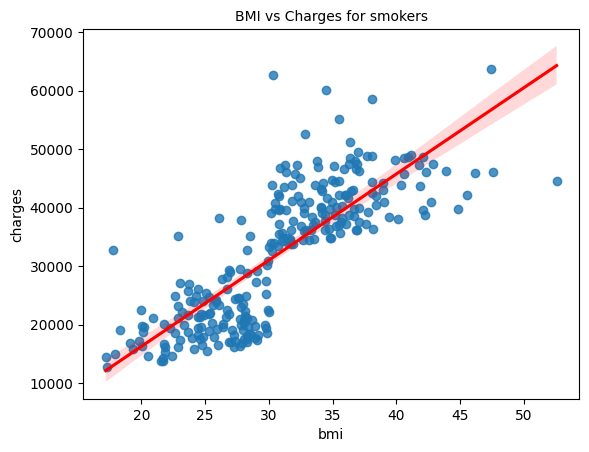

In [19]:
smoke = project_functions3.smoke(df)
plot1 = sns.regplot(data = smoke,x = 'bmi', y = 'charges', line_kws={"color": "red"})
plot1.set_title("BMI vs Charges for smokers", size = 10)

As we can see from the scatter-graph for the smokers, the graph has a strong positive correlation (0.806) which was something that was expected. What was unexpected was a vertical line that could be seen at around 30 BMI where there seems to be a wall where there is a large increase in Charges and BMI. Aside from the couple outliers, in general bmi and charges for smokers are very positively correlated.

Text(0.5, 1.0, 'BMI vs Charges for Non-smokers')

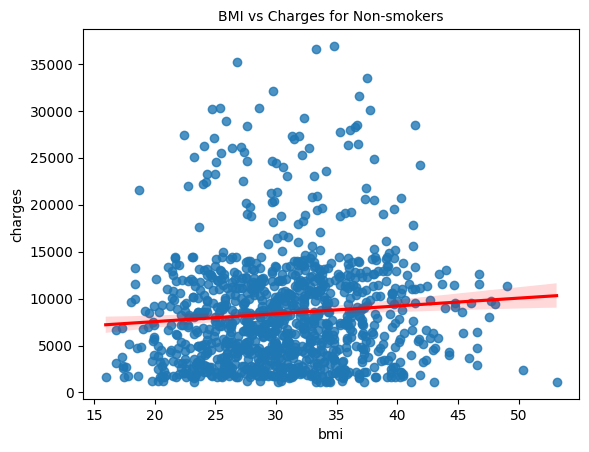

In [20]:
nosmoke = project_functions3.nosmoke(df)
plot2 = sns.regplot(data = nosmoke,x = 'bmi', y = 'charges', line_kws={"color": "red"})
plot2.set_title("BMI vs Charges for Non-smokers", size = 10)

In the graph for the non-smokers, we can see that the graph has a very weak correlation (0.084) to each other. This was a very surprising graph to discover as i expected for there to be atleast a positive correlation. With the findings, we can assume that the general correlation between BMI and charges are not strong by itself; when smoking is introduced into the equation, then we can see that it affects charges against BMI way more.

### Does Region affect BMI and Charges? 

I wanted to know whether or nto different regions in the US affected BMI and Charges.

[Text(0, 0, '13406.4'),
 Text(0, 0, '12417.6'),
 Text(0, 0, '14735.4'),
 Text(0, 0, '12346.9')]

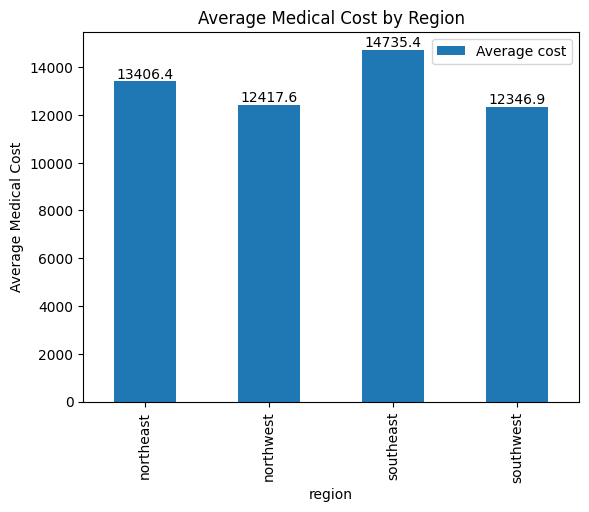

In [21]:
charge = project_functions3.clean1(df2)
ax2 = charge.plot.bar(x = 'region', title = "Average Medical Cost by Region")
ax2.set_ylabel("Average Medical Cost")
ax2.bar_label(ax2.containers[0])

[Text(0, 0, '29.1735'),
 Text(0, 0, '29.1998'),
 Text(0, 0, '33.356'),
 Text(0, 0, '30.5966')]

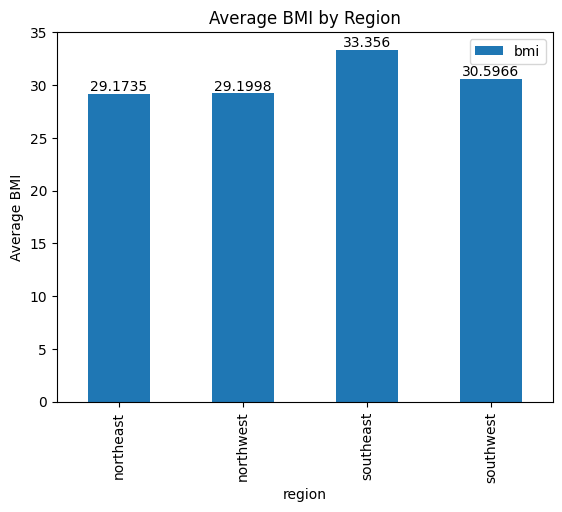

In [22]:
bmi = project_functions3.clean2(df2)
ax1 = bmi.plot.bar(x = 'region', title = 'Average BMI by Region')
ax1.set_ylabel("Average BMI")
ax1.bar_label(ax1.containers[0])

From the bar graphs above showing the average BMI and charges of their respective regions, we can see that southeast has the highest BMI and Charges average while the southwest had the lowest charges but it has a pretty high BMI average. The graphs of the BMI and Charges are interesting as there seems to be no correlation between the two with the exception for the southeast region where both are consistent. But then again when seeing the results of the smokers and non-smokers, for non-smokers the bmi and charges has next to no correlation.

### Which region has a higher percentage of smokers? Does this highly affect the average BMI and Charges?

The results from the previous research question lead onto this question where i was wondering if the percentage of smokers in each region affected the averages of BMI and Charges that much.

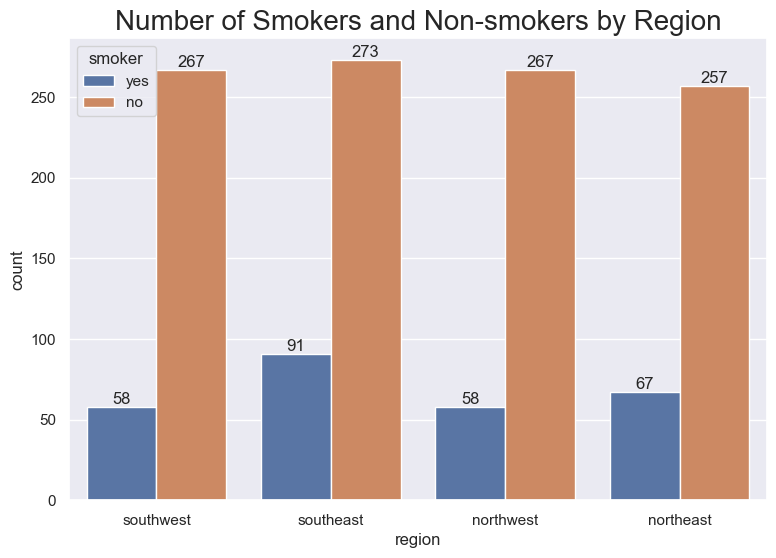

In [23]:
sns.set(rc={'figure.figsize':(9,6)})
plot3 = sns.countplot(data = df,x = 'region', hue = 'smoker')
plot3.set_title("Number of Smokers and Non-smokers by Region", size = 20)
for container in plot3.containers:
    plot3.bar_label(container)

The southeast region has a larger population of smokers as compared to the other regions which explains the higher medical charges for the southeast region. Surprisingly the southwest and northwest region had the same number of smokers and non-smokers

Text(0.5, 1.0, "BMI of each region's smokers and non-smokers")

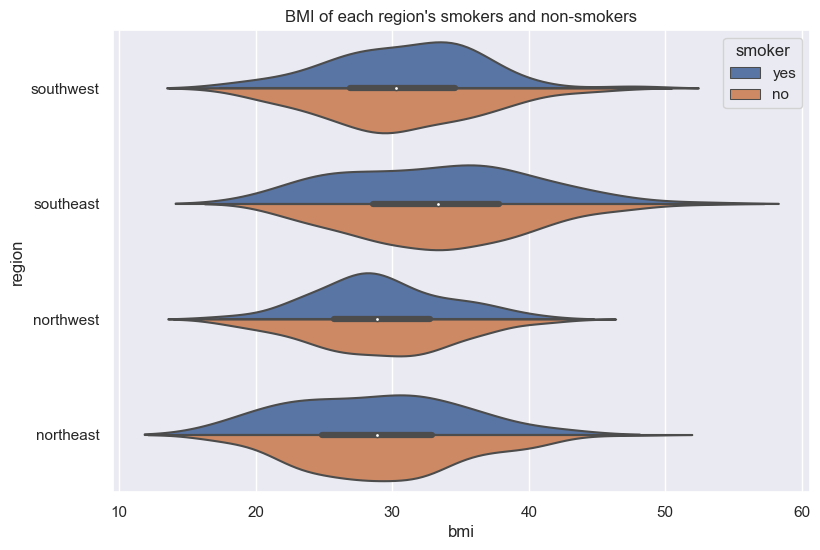

In [24]:
plot4 =  sns.violinplot(data=df, x='bmi', y='region', hue='smoker', split=True)
plot4.set_title("BMI of each region's smokers and non-smokers")

from the violin graph above, we can see that surprisingly in the northeast and northwest regions, there are more non-smokers that have a higher bmi than smokers. The southwest and southeast regions shows that there smokers has a larger range of people in varying bmi's while non-smokers tend to gravitate towards having the same bmi (~28 SW, ~33 SE)

Text(0.5, 1.0, "Charges of each region's smokers and non-smokers")

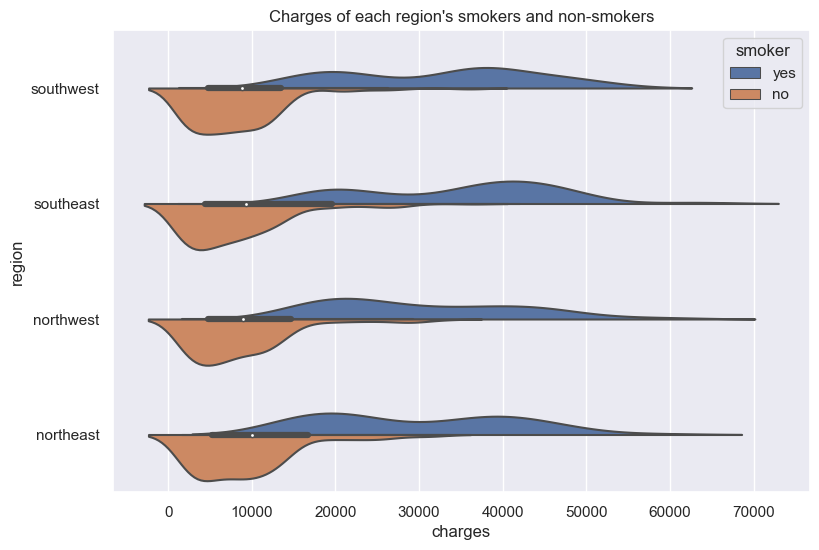

In [25]:
plot5 =  sns.violinplot(data=df, x='charges', y='region', hue='smoker', split=True)
plot5.set_title("Charges of each region's smokers and non-smokers")

We can see that smokers has an incredibly larger amount of charges as compared to non-smokers. The range of non-smokers seem to be from 0 to around 20000 where there are a smaller amount of people breaking past the 20000 barrier. The opposite can be seen from smokers where they have a way larger range where they start from around 10000 to ~56000, where there are a few outliers reaching all the way to 70000 mark. We can see that the general trend in the smokers is that they have two humps, one appearing in the 20000's and another in the 40000's. 

In [28]:
plot1.figure.savefig('../images/kennsmokebar.png')
plot2.figure.savefig('../images/kennnosmokebar.png')
ax1.figure.savefig('../images/kennbmireg.png')
ax2.figure.savefig('../images/kennchargerreg.png')
plot3.figure.savefig('../images/kennnumsmoker.png')
plot4.figure.savefig('../images/kennbmiviolin.png')
plot5.figure.savefig('../images/kennchargesviolin.png')